<a href="https://colab.research.google.com/github/Laryssafsp/Analises-Financeiras/blob/main/Como_obter%2C_processar_e_analisar_dados_de_Fundos_de_Investimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como obter e análisar dados de fundos de investimentos

Fonte: portal de dados da CVN (*Órgão regulador do merdado financeiro brasileiro* e no seu escopo está coordenar, gerenciar, realizar um complice do que acontece com o mercado)

- Qual fundo do Brasil tem maior PL (patrimônio liquído)?
- Como obter a variação de cota para um fundo específico?
- Como recuperar dados de um fundo específico sabendo apenas o seu nome?
- Qual o fundo que teve a cota que mais subiu?
- Qual o fundo que teve a cota que mais caiu?





## 0. Noções básicas
[**O que é um Fundo de Investimento:**](https://maisretorno.com/portal/termos/f/fundo-de-investimentos)

Um fundo investimentos funciona como uma espécie de condomínio.

Dentro de um fundo temos vários segmentos:

Existe a empresa administradora do fundo, o gestor, os profissionais que fazem a auditoria sobre os números do fundo e, por fim, mas não menos importante, os investidores, ou nesse caso, os cotistas.

Para simplificar a compreensão de um fundo, é sempre válido pensar nele exatamente como um condomínio:
- As pessoas vivem juntas em um mesmo terreno, porque assim várias coisas acabam sendo divididas. Os custos para manutenção são compartilhados, a segurança, a área de lazer e diversas outras áreas.

O fundo de investimento parte da mesma prerrogativa: Porque investir sozinho, se o investidor pode fazer isso com mais pessoas, utilizando muito mais recursos e contratando um profissional ultra qualificado para cuidar de todo esse dinheiro?

É por isso que, em grande parte, os fundos funcionam como condomínios.

----


**Ferramentas importantes para ajudar a analisar e comparar fundos de investimento**

Portal de dados Anbima https://dataanbima.com.br/

Mais Retorno https://maisretorno.com/comparacao-fundos

1. Identificar os sites que farão parte da busca (cotas e cadastral)
2. Iniciar extração do cotas
3. Mostrar porque precisamos do cadastral
4. Obter e tratar o cadastral
5. Juntar os dois e começar as análises
6. Buscar fundo de maior PL
7. Buscar um Fundo Específico
8. Fundos que mais subiram e que mais caíram!






### O que será realizado?
*   extração explorando as páginas da [CVN](https://dados.cvm.gov.br/)
** aqui estão contidas informações importantes no mercado fianceito, como demonstrativos e balanços de empresas de capital aberto.
Informações cadastrais e de desempenho de fundos de investimento, dentro outros.

- dados de desemenho de fundoshttps://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/
- dados cadastrais dos fundos? https://dados.cvm.gov.br/dados/FI/cad/dADOS/


# **1. Extração e processamento dos dados de desempenho**

##1.1 importação das bibliotecas

In [ ]:
import zipfile # processar arquivos zips
import io # remover necessidade de realizar o download
import requests
import pandas as pd

## 1.2 Captura dos dados

In [28]:
arquivo = "inf_diario_fi_202403.csv"
link = "https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202403.zip"


In [29]:
r = requests.get(link)
r # sucesso

<Response [200]>

In [32]:
 #zipfile = abre o arquivo ZIP | io.BytesIO = memoria RAM - não precisa baixar arquivo | r.contant retorna o conteudo
zf = zipfile.ZipFile(io.BytesIO(r.content))
zf

<zipfile.ZipFile file=<_io.BytesIO object at 0x7cdd0cfef6f0> mode='r'>

In [33]:
arquivo_fi = zf.open(arquivo)
arquivo_fi

<zipfile.ZipExtFile name='inf_diario_fi_202403.csv' mode='r' compress_type=deflate>

In [34]:
#leitura das linhas
linhas = arquivo_fi.readlines()
linhas

[b'TP_FUNDO;CNPJ_FUNDO;DT_COMPTC;VL_TOTAL;VL_QUOTA;VL_PATRIM_LIQ;CAPTC_DIA;RESG_DIA;NR_COTST\r\n',
 b'FI;00.017.024/0001-53;2024-03-01;1104983.25;34.795001500000;1106498.58;0.00;0.00;1\r\n',
 b'FI;00.017.024/0001-53;2024-03-04;1105459.46;34.807271400000;1106888.77;0.00;0.00;1\r\n',
 b'FI;00.017.024/0001-53;2024-03-05;1105916.74;34.819279100000;1107270.62;0.00;0.00;1\r\n',
 b'FI;00.017.024/0001-53;2024-03-06;1106331.18;34.830692100000;1107633.56;0.00;0.00;1\r\n',
 b'FI;00.017.024/0001-53;2024-03-07;1106477.80;34.840756700000;1107953.62;0.00;0.00;1\r\n',
 b'FI;00.017.024/0001-53;2024-03-08;1106926.10;34.851743000000;1108302.99;0.00;0.00;1\r\n',
 b'FI;00.017.024/0001-53;2024-03-11;1107369.70;34.862872400000;1108656.91;0.00;0.00;1\r\n',
 b'FI;00.017.024/0001-53;2024-03-12;1105232.13;34.873668500000;1106164.86;0.00;2835.37;1\r\n',
 b'FI;00.017.024/0001-53;2024-03-13;1105447.57;34.884779700000;1106517.30;0.00;0.00;1\r\n',
 b'FI;00.017.024/0001-53;2024-03-14;1105901.61;34.896103200000;1106876

In [37]:
# separando as linhas
linhas_arquivo = [i.strip().decode("ISO-8859-1") for i in linhas]
linhas_arquivo

['TP_FUNDO;CNPJ_FUNDO;DT_COMPTC;VL_TOTAL;VL_QUOTA;VL_PATRIM_LIQ;CAPTC_DIA;RESG_DIA;NR_COTST',
 'FI;00.017.024/0001-53;2024-03-01;1104983.25;34.795001500000;1106498.58;0.00;0.00;1',
 'FI;00.017.024/0001-53;2024-03-04;1105459.46;34.807271400000;1106888.77;0.00;0.00;1',
 'FI;00.017.024/0001-53;2024-03-05;1105916.74;34.819279100000;1107270.62;0.00;0.00;1',
 'FI;00.017.024/0001-53;2024-03-06;1106331.18;34.830692100000;1107633.56;0.00;0.00;1',
 'FI;00.017.024/0001-53;2024-03-07;1106477.80;34.840756700000;1107953.62;0.00;0.00;1',
 'FI;00.017.024/0001-53;2024-03-08;1106926.10;34.851743000000;1108302.99;0.00;0.00;1',
 'FI;00.017.024/0001-53;2024-03-11;1107369.70;34.862872400000;1108656.91;0.00;0.00;1',
 'FI;00.017.024/0001-53;2024-03-12;1105232.13;34.873668500000;1106164.86;0.00;2835.37;1',
 'FI;00.017.024/0001-53;2024-03-13;1105447.57;34.884779700000;1106517.30;0.00;0.00;1',
 'FI;00.017.024/0001-53;2024-03-14;1105901.61;34.896103200000;1106876.47;0.00;0.00;1',
 'FI;00.017.024/0001-53;2024-03-1

In [70]:
# separando em listas de listas
listas_de_listas = [i.split(';') for i in linhas_arquivo]

In [71]:
listas_de_listas[0] # colunas

['TP_FUNDO',
 'CNPJ_FUNDO',
 'DT_COMPTC',
 'VL_TOTAL',
 'VL_QUOTA',
 'VL_PATRIM_LIQ',
 'CAPTC_DIA',
 'RESG_DIA',
 'NR_COTST']

In [72]:
informes_diarios = pd.DataFrame(listas_de_listas[1:], columns = listas_de_listas[0])
informes_diarios

# df = pd.DataFrame(listas_de_listas, columns = listas_de_listas[0])
# informes_diarios = df[1:].reset_index()

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,FI,00.017.024/0001-53,2024-03-01,1104983.25,34.795001500000,1106498.58,0.00,0.00,1
1,FI,00.017.024/0001-53,2024-03-04,1105459.46,34.807271400000,1106888.77,0.00,0.00,1
2,FI,00.017.024/0001-53,2024-03-05,1105916.74,34.819279100000,1107270.62,0.00,0.00,1
3,FI,00.017.024/0001-53,2024-03-06,1106331.18,34.830692100000,1107633.56,0.00,0.00,1
4,FI,00.017.024/0001-53,2024-03-07,1106477.80,34.840756700000,1107953.62,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...
517058,FI,97.929.213/0001-34,2024-03-22,86451164.30,11.846755870000,85156081.54,0.00,0.00,2
517059,FI,97.929.213/0001-34,2024-03-25,86504569.49,11.854106150000,85208916.30,0.00,0.00,2
517060,FI,97.929.213/0001-34,2024-03-26,86476293.59,11.850093060000,85180069.71,0.00,0.00,2
517061,FI,97.929.213/0001-34,2024-03-27,85398962.92,11.860406180000,85254201.81,0.00,0.00,2


In [73]:
informes_diarios.dtypes

TP_FUNDO         object
CNPJ_FUNDO       object
DT_COMPTC        object
VL_TOTAL         object
VL_QUOTA         object
VL_PATRIM_LIQ    object
CAPTC_DIA        object
RESG_DIA         object
NR_COTST         object
dtype: object

In [74]:
# Mudar Tipo
informes_diarios[['VL_TOTAL','VL_QUOTA','VL_PATRIM_LIQ','CAPTC_DIA','RESG_DIA','NR_COTST']] = informes_diarios[['VL_TOTAL','VL_QUOTA','VL_PATRIM_LIQ','CAPTC_DIA','RESG_DIA','NR_COTST']].apply(pd.to_numeric)

In [75]:
#informes_diarios[['DT_COMPTC']] = informes_diarios[['DT_COMPTC']].apply(pd.to_datetime)

In [76]:
informes_diarios.dtypes

TP_FUNDO          object
CNPJ_FUNDO        object
DT_COMPTC         object
VL_TOTAL         float64
VL_QUOTA         float64
VL_PATRIM_LIQ    float64
CAPTC_DIA        float64
RESG_DIA         float64
NR_COTST           int64
dtype: object

In [77]:
informes_diarios.shape

(517063, 9)

In [78]:
informes_diarios.head()

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,FI,00.017.024/0001-53,2024-03-01,1104983.25,34.795001,1106498.58,0.0,0.0,1
1,FI,00.017.024/0001-53,2024-03-04,1105459.46,34.807271,1106888.77,0.0,0.0,1
2,FI,00.017.024/0001-53,2024-03-05,1105916.74,34.819279,1107270.62,0.0,0.0,1
3,FI,00.017.024/0001-53,2024-03-06,1106331.18,34.830692,1107633.56,0.0,0.0,1
4,FI,00.017.024/0001-53,2024-03-07,1106477.80,34.840757,1107953.62,0.0,0.0,1


# **2. Análises Preliminares**

Já emtendemos que a planilha tras um mês para todos os fundos. E se quiséssemos trazer um dia específico para todos os fundos?

In [79]:
# Dias disponíveis na planilha
informes_diarios.DT_COMPTC.unique()

array(['2024-03-01', '2024-03-04', '2024-03-05', '2024-03-06',
       '2024-03-07', '2024-03-08', '2024-03-11', '2024-03-12',
       '2024-03-13', '2024-03-14', '2024-03-15', '2024-03-18',
       '2024-03-19', '2024-03-20', '2024-03-21', '2024-03-22',
       '2024-03-25', '2024-03-26', '2024-03-27', '2024-03-28',
       '2024-03-29'], dtype=object)

## 2.1. Comparativo de Patrimônio Liquido [PL]

Qual o maior fundo de patrimônio líquido?

In [84]:
# Maior PL - fundos ativos/inativos na maior data cadastrada
#comparativo = informes_diarios[informes_diarios.DT_COMPTC == max(informes_diarios.DT_COMPTC)]
comparativo = informes_diarios[informes_diarios.DT_COMPTC == '2024-03-28']
comparativo.sort_values('VL_PATRIM_LIQ')

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
234036,FI,32.222.977/0001-40,2024-03-28,-1.637504e+07,-568.010552,-1.645338e+07,0.000000e+00,0.000000e+00,16
140439,FI,21.126.351/0001-13,2024-03-28,2.011433e+07,-0.182363,-3.255497e+06,0.000000e+00,0.000000e+00,3
210626,FI,29.904.958/0001-99,2024-03-28,1.517824e+08,-24.350586,-2.151152e+06,0.000000e+00,0.000000e+00,2
173498,FI,26.327.862/0001-17,2024-03-28,5.318821e+07,-0.033505,-2.015781e+06,0.000000e+00,0.000000e+00,5
173458,FI,26.326.293/0001-95,2024-03-28,7.899840e+06,-0.131238,-1.034897e+06,0.000000e+00,0.000000e+00,3
...,...,...,...,...,...,...,...,...,...
3259,FI,01.597.187/0001-15,2024-03-28,9.793251e+10,342.967101,9.793852e+10,1.300932e+09,8.505966e+08,44
919,FI,00.822.055/0001-87,2024-03-28,1.137528e+11,54.672731,1.137516e+11,2.534600e+07,0.000000e+00,1
435235,FI,46.133.770/0001-03,2024-03-28,1.598266e+11,122.564260,1.598250e+11,8.647328e+09,2.658261e+09,1
389041,FI,42.592.315/0001-15,2024-03-28,1.598311e+11,1.247118,1.598297e+11,8.647328e+09,2.647690e+09,92532


In [88]:
comparativo.sort_values('VL_PATRIM_LIQ').CNPJ_FUNDO.iloc[-1]

'07.593.972/0001-86'

Repare que não conseguimos saber qual é o fundo pois não temos as infromações cadastrais

## 2.3. Variação da Cota

In [ ]:
informes_diarios[informes_diarios['CNPJ_FUNDO'] == comparativo.sort_values('VL_PATRIM_LIQ').CNPJ_FUNDO.iloc[-1]]

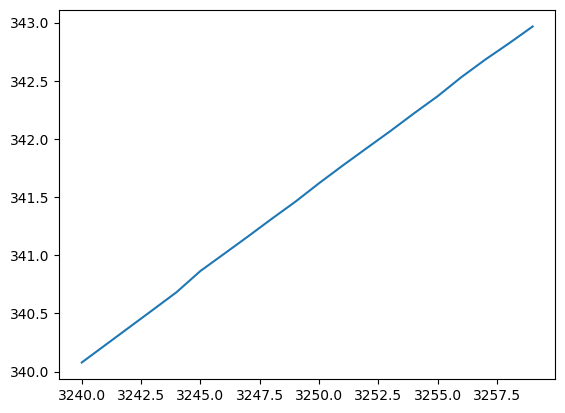

In [94]:
# Analise extra
fundo = informes_diarios[informes_diarios['CNPJ_FUNDO'] == '01.597.187/0001-15']
fundo.VL_QUOTA.plot();

# **3. Análise com dados cadastrais**

## 3.1. Extração dos dados de cadastro

In [105]:
url = 'https://dados.cvm.gov.br/dados/FI/cad/dADOS/cad_fi.csv'

In [107]:
cadastral = pd.read_csv(url, sep = ';', encoding = 'ISO-8859-1')
cadastral.head()

<ipython-input-107-fe00021f0a38>:1: DtypeWarning: Columns (14,17,18,20,22,24,27,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  cadastral = pd.read_csv(url, sep = ';', encoding = 'ISO-8859-1')


,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
0,FACFIF,00.000.684/0001-21,DEUTSCHE BANK FDO APLIC QUOTAS FDO INV FINANCE...,2003-04-30,1994-12-20,19.0,2000-08-01,CANCELADA,2000-08-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FACFIF,00.000.731/0001-37,ITAMARITI CASH FUNDO APLICACAO QUOTAS FDOS INV...,2003-04-30,1994-05-18,40681.0,1996-01-26,CANCELADA,1996-01-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FACFIF,00.000.732/0001-81,FUNDO APLIC. QUOTAS DE F.I. SANTANDER CURTO PRAZO,2003-04-30,1994-05-24,27.0,1999-09-03,CANCELADA,1999-09-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FACFIF,00.000.740/0001-28,FUNDO DE APLIC EM QUOTAS DE FUNDOS DE INV BMC ...,2003-04-30,1994-05-23,40690.0,1996-06-10,CANCELADA,1996-06-10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FACFIF,00.000.749/0001-39,BALANCE FUNDO APLICACAO QUOTAS FUNDO INVESTIME...,2003-04-30,1994-05-12,35.0,2000-06-26,CANCELADA,2000-06-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
cadastral.shape # Ativos e Inativos

(77920, 41)

## 3.2 Fundo de maior PL (patromônio liquido)

In [104]:
# maior fundo
comparativo.sort_values('VL_PATRIM_LIQ').CNPJ_FUNDO.iloc[-1]

'07.593.972/0001-86'

In [108]:
cadastral[cadastral['CNPJ_FUNDO'] == comparativo.sort_values('VL_PATRIM_LIQ').CNPJ_FUNDO.iloc[-1]]

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
12169,FI,07.593.972/0001-86,BRASILPREV TOP TPF FUNDO DE INVESTIMENTO RENDA...,2005-09-19,2005-09-13,62324.0,NaN,EM FUNCIONAMENTO NORMAL,2005-09-21,2005-09-21,...,30.822.936/0001-69,BB GESTAO DE RECURSOS DTVM S.A,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,00.000.000/0001-91,BANCO DO BRASIL S.A.,00.000.000/0001-91,BANCO DO BRASIL S.A.,N,Previdência RF Duração Baixa Soberano


## 3.3. Retornando algum fundo específico de acordo com o CNPJ

In [109]:
cadastral[cadastral['CNPJ_FUNDO'] == '01.597.187/0001-15']

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
5831,FI,01.597.187/0001-15,SPECIAL RENDA FIXA REFERENCIADO DI - FUNDO DE ...,2005-03-16,1996-12-30,23710.0,NaN,EM FUNCIONAMENTO NORMAL,2005-03-07,1996-12-30,...,40.430.971/0001-96,ITAU UNIBANCO ASSET MANAGEMENT LTDA.,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,60.701.190/0001-04,ITAU UNIBANCO S.A.,60.701.190/0001-04,ITAU UNIBANCO S.A.,N,Renda Fixa Duração Baixa Grau de Invest.
66252,FIF,01.597.187/0001-15,SPECIAL RENDA FIXA REFERENCIADO DI - FUNDO DE ...,2003-04-30,1996-12-30,9016.0,2005-03-07,CANCELADA,2005-03-07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.4. Retornando algum fundo específico de acordo com o Nome

In [ ]:
cadastral[cadastral['DENOM_SOCIAL'].str.contains('ALASKA')]

In [123]:
alaskas = cadastral[cadastral['DENOM_SOCIAL'].str.contains('ALASKA BLACK') &
                    cadastral['GESTOR'].str.contains('ALASKA INVESTIMENTOS LTDA.') &
                    ~ cadastral['SIT'].str.contains('CANCELADA')]
alaskas.head()

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
20641,FI,12.055.107/0001-16,ALASKA BLACK MASTER FUNDO DE INVESTIMENTO EM A...,2010-07-31,2010-06-02,145238.0,NaN,EM FUNCIONAMENTO NORMAL,2010-09-17,2010-09-17,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,N,Ações Livre
21693,FI,12.987.743/0001-86,ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE...,2011-01-12,2011-01-12,154849.0,NaN,EM FUNCIONAMENTO NORMAL,2011-01-24,2011-01-24,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,N,Ações Livre
33464,FI,26.648.868/0001-96,ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE...,2016-12-29,2016-12-28,270652.0,NaN,EM FUNCIONAMENTO NORMAL,2017-01-03,2017-01-03,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,N,Ações Livre
38973,FI,32.757.743/0001-05,ALASKA BLACK ADVISORY XP SEGUROS PREVIDÊNCIA F...,2019-08-29,2019-08-27,334723.0,NaN,EM FUNCIONAMENTO NORMAL,2019-11-01,2019-11-01,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,42.272.526/0001-70,BNY MELLON BANCO S.A.,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,N,Previdência Multimercado Livre
38983,FI,32.760.103/0001-46,ALASKA BLACK ADVISORY XP SEGUROS FIFE PREVIDÊN...,2019-08-29,2019-08-27,334731.0,NaN,EM FUNCIONAMENTO NORMAL,2019-10-31,2019-10-31,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,42.272.526/0001-70,BNY MELLON BANCO S.A.,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,N,Previdência Multimercado Livre


Analisando os Fundos

In [124]:
alaskas.CNPJ_FUNDO

20641    12.055.107/0001-16
21693    12.987.743/0001-86
33464    26.648.868/0001-96
38973    32.757.743/0001-05
38983    32.760.103/0001-46
38990    32.761.323/0001-94
42222    35.939.700/0001-20
42228    35.939.857/0001-56
Name: CNPJ_FUNDO, dtype: object

In [125]:
alaskas.index

Index([20641, 21693, 33464, 38973, 38983, 38990, 42222, 42228], dtype='int64')

In [128]:
fundo_df = pd.DataFrame(columns = ['Fundo','Classe','PL'])
fundo_df

,Fundo,Classe,PL


In [133]:
# Populando o Dataframe
for cnpj in alaskas.CNPJ_FUNDO:
    fundo = cadastral[cadastral['CNPJ_FUNDO'] == cnpj]
    fundo_df.loc[cnpj] = [fundo['DENOM_SOCIAL'].values[0],
                          fundo['CLASSE'].values[0],
                          fundo['VL_PATRIM_LIQ'].values[0]]
fundo_df

,Fundo,Classe,PL
12.055.107/0001-16,ALASKA BLACK MASTER FUNDO DE INVESTIMENTO EM A...,Fundo de Ações,1.234656e+09
12.987.743/0001-86,ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE...,Fundo de Ações,1.014600e+09
26.648.868/0001-96,ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE...,Fundo de Ações,2.189155e+08
32.757.743/0001-05,ALASKA BLACK ADVISORY XP SEGUROS PREVIDÊNCIA F...,Fundo Multimercado,5.452980e+07
32.760.103/0001-46,ALASKA BLACK ADVISORY XP SEGUROS FIFE PREVIDÊN...,Fundo Multimercado,1.413967e+08
32.761.323/0001-94,ALASKA BLACK ADVISORY XP SEGUROS PREVIDENCIÁRI...,Fundo Multimercado,1.533310e+07
35.939.700/0001-20,ALASKA BLACK 70 ADVISORY XP SEGUROS PREVIDENCI...,Fundo Multimercado,3.920075e+07
35.939.857/0001-56,ALASKA BLACK 100 ADV XP SEGUROS PREVIDENCIÁRIO...,Fundo Multimercado,5.004581e+07


In [141]:
# Iterar sobre os CNPJs em alaskas.CNPJ_FUNDO
for cnpj in alaskas.CNPJ_FUNDO:
    # Filtrar o DataFrame cadastral pelo CNPJ atual
    fundo = cadastral[cadastral['CNPJ_FUNDO'] == cnpj]
    # Se houver uma correspondência, imprimir o CNPJ e o nome associado a ele
    if not fundo.empty:
        print("CNPJ:", cnpj)
        print("Nome:", fundo['DENOM_SOCIAL'].values[0])


CNPJ: 12.055.107/0001-16
Nome: ALASKA BLACK MASTER FUNDO DE INVESTIMENTO EM AÇÕES - BDR NÍVEL  I
CNPJ: 12.987.743/0001-86
Nome: ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES - BDR NÍVEL I
CNPJ: 26.648.868/0001-96
Nome: ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES II - BDR NÍVEL I
CNPJ: 32.757.743/0001-05
Nome: ALASKA BLACK ADVISORY XP SEGUROS PREVIDÊNCIA FI EM COTAS DE FI MULTIMERCADO 100
CNPJ: 32.760.103/0001-46
Nome: ALASKA BLACK ADVISORY XP SEGUROS FIFE PREVIDÊNCIA FUNDO DE INVESTIMENTO MULTIMERCADO
CNPJ: 32.761.323/0001-94
Nome: ALASKA BLACK ADVISORY XP SEGUROS PREVIDENCIÁRIO FIC DE FUNDOS DE INVESTIMENTO MULTIMERCADO 70
CNPJ: 35.939.700/0001-20
Nome: ALASKA BLACK 70 ADVISORY XP SEGUROS PREVIDENCIÁRIO FI EM COTAS DE FI MULTIMERCADO
CNPJ: 35.939.857/0001-56
Nome: ALASKA BLACK 100 ADV XP SEGUROS PREVIDENCIÁRIO FI EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO


In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

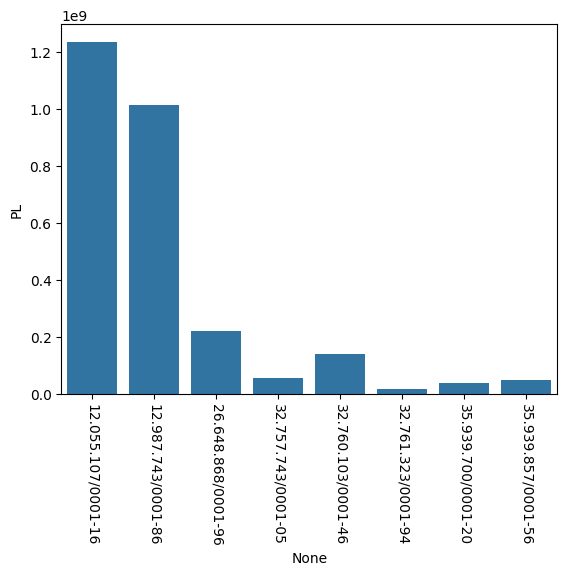

In [138]:
sns.barplot(data = fundo_df, x = fundo_df.index, y = fundo_df.PL)
plt.xticks(rotation=270);

## 3.5 Fudos que mais subiram e que mais cairam

### 3.5.1. Manipulações iniciais nos dados

Filtrando Fundos pelo número de cotistas

In [142]:
filtro = informes_diarios[informes_diarios['NR_COTST'] > 1000] # pelo menos 1000 clientes

In [147]:
filtro.head()

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
20,FI,00.068.305/0001-35,2024-03-01,38066262.07,35.946014,38050556.02,0.0,0.00,5982
21,FI,00.068.305/0001-35,2024-03-04,38082850.55,35.959480,38064810.57,0.0,0.00,5982
22,FI,00.068.305/0001-35,2024-03-05,38090353.72,35.975051,38081292.48,0.0,0.00,5982
23,FI,00.068.305/0001-35,2024-03-06,38108359.23,35.990896,38096957.90,0.0,1107.87,5981
24,FI,00.068.305/0001-35,2024-03-07,38125981.75,36.005404,38112315.11,0.0,0.00,5981


In [155]:
#Transformar em cada coluna como um ativo
fundos = filtro.pivot(index = "DT_COMPTC", columns = 'CNPJ_FUNDO', values  =['VL_TOTAL','VL_QUOTA','VL_PATRIM_LIQ'])
fundos.head()

VL_TOTAL                                        \
CNPJ_FUNDO 00.068.305/0001-35 00.071.477/0001-68 00.222.816/0001-60   
DT_COMPTC                                                             
2024-03-01        38066262.07       1.597516e+09       1.037955e+09   
2024-03-04        38082850.55       1.598924e+09       1.037252e+09   
2024-03-05        38090353.72       1.596291e+09       1.037234e+09   
2024-03-06        38108359.23       1.590898e+09       1.031601e+09   
2024-03-07        38125981.75       1.588088e+09       1.030885e+09   

                                                                     \
CNPJ_FUNDO 00.280.302/0001-60 00.306.278/0001-91 00.322.699/0001-06   
DT_COMPTC                                                             
2024-03-01       4.281414e+08       2.377250e+09       3.327559e+09   
2024-03-04       4.283060e+08       2.377711e+09       3.332828e+09   
2024-03-05       4.281088e+08       2.378188e+09       3.341389e+09   
2024-03-06       4.282775e+08       2.373429e+09       3.317373e+09   
2024-03-07       4.282204e+08       2.373029e+09       3.310603e+09   

                                                                     \
CNPJ_FUNDO 00.360.293/0001-18 00.398.561/0001-90 00.400.490/0001-13   
DT_COMPTC                                                             
2024-03-01        43714907.54        64274072.70       2.777888e+08   
2024-03-04        43587321.09        63325244.39       2.763648e+08   
2024-03-05        43316443.35        64049182.48       2.762924e+08   
2024-03-06        43212426.91        64078879.16       2.754898e+08   
2024-03-07        42852233.98        63787158.68       2.721139e+08   

                               ...      VL_PATRIM_LIQ                     \
CNPJ_FUNDO 00.524.617/0001-06  ... 60.906.179/0001-72 67.976.449/0001-60   
DT_COMPTC                      ...                                         
2024-03-01        53298328.32  ...       4.988976e+09        99888505.19   
2024-03-04        53218883.66  ...       4.966101e+09        99219640.17   
2024-03-05        53288430.56  ...       4.978743e+09        98927964.87   
2024-03-06        53135829.17  ...       4.988984e+09        99307233.22   
2024-03-07        53074578.02  ...       4.985096e+09        98828661.38   

                                                                     \
CNPJ_FUNDO 68.599.141/0001-06 68.623.479/0001-56 68.670.512/0001-07   
DT_COMPTC                                                             
2024-03-01       1.171894e+09       6.213271e+08       2.040805e+08   
2024-03-04       1.171089e+09       6.207652e+08       2.004942e+08   
2024-03-05       1.170547e+09       6.210956e+08       1.993854e+08   
2024-03-06       1.169751e+09       6.231464e+08       1.999999e+08   
2024-03-07       1.169148e+09       6.232025e+08       1.925743e+08   

                                                                     \
CNPJ_FUNDO 73.899.759/0001-21 88.002.696/0001-36 88.198.056/0001-43   
DT_COMPTC                                                             
2024-03-01       2.213122e+08        58864701.35        99995269.65   
2024-03-04       2.197912e+08        58504138.01        98724545.85   
2024-03-05       2.193333e+08        58381904.39        99038007.31   
2024-03-06       2.206649e+08        58764743.64        99039252.52   
2024-03-07       2.194189e+08        58470414.94        99075809.85   

                                                  
CNPJ_FUNDO 97.519.703/0001-62 97.519.794/0001-36  
DT_COMPTC                                         
2024-03-01       4.367680e+09       1.140226e+08  
2024-03-04       4.371594e+09       1.136330e+08  
2024-03-05       4.369165e+09       1.135532e+08  
2024-03-06       4.374058e+09       1.135794e+08  
2024-03-07       4.385943e+09       1.135664e+08  

[5 rows x 4629 columns]

* Para calcular o retorno dos fundos, vamos normalizar o valor das cotas (padronização)

In [160]:
#normalizando baseado no primeiro valor
normalizados = fundos['VL_QUOTA']/fundos['VL_QUOTA'].iloc[0]
normalizados.head()

# consegue ver a restabilidade de maneira mais fácil

CNPJ_FUNDO,00.068.305/0001-35,00.071.477/0001-68,00.222.816/0001-60,00.280.302/0001-60,00.306.278/0001-91,00.322.699/0001-06,00.360.293/0001-18,00.398.561/0001-90,00.400.490/0001-13,00.524.617/0001-06,...,60.906.179/0001-72,67.976.449/0001-60,68.599.141/0001-06,68.623.479/0001-56,68.670.512/0001-07,73.899.759/0001-21,88.002.696/0001-36,88.198.056/0001-43,97.519.703/0001-62,97.519.794/0001-36
DT_COMPTC,,,,,,,,,,,,,,,,,,,,,
2024-03-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2024-03-04,1.000375,1.000352,1.000346,1.000422,1.000530,1.000466,0.998075,0.984954,0.996416,0.998864,...,1.000470,0.993423,1.000353,1.000375,0.982422,0.993485,0.993891,0.987979,1.000508,1.000423
2024-03-05,1.000808,1.000699,1.000878,1.000904,1.000869,1.000930,1.000820,0.997663,0.996398,1.000633,...,1.000875,0.991476,1.000708,1.000809,0.977014,0.991604,0.991819,0.991339,1.000937,1.000846
2024-03-06,1.001249,1.001051,1.001372,1.001313,1.001336,1.001409,0.999183,0.998487,0.994697,0.998402,...,1.001347,0.997540,1.001055,1.001251,0.980028,0.997654,0.998339,0.991718,1.001576,1.001269
2024-03-07,1.001652,1.001387,1.001819,1.001707,1.001758,1.001926,0.997370,0.994492,0.993269,0.996927,...,1.001771,0.993157,1.001411,1.001655,0.943539,0.993272,0.993348,0.992257,1.002290,1.001696


In [162]:
# ultima linha consegue calcula o retorno
cotas_normalizados = pd.DataFrame(normalizados.iloc[-1])
cotas_normalizados

,2024-03-28
CNPJ_FUNDO,
00.068.305/0001-35,1.007165
00.071.477/0001-68,1.006571
00.222.816/0001-60,1.006476
00.280.302/0001-60,1.007516
00.306.278/0001-91,1.008595
...,...
73.899.759/0001-21,0.990800
88.002.696/0001-36,0.986089
88.198.056/0001-43,1.022054


In [167]:
# Supondo que você queira renomear '2024-03-28' para 'nova_coluna'
cotas_normalizados = cotas_normalizados.rename(columns={'2024-03-28': 'Quota_Final'})
cotas_normalizados.sort_values('Quota_Final', ascending = False)[:5] # filtro dos 5 primeiros

,Quota_Final
CNPJ_FUNDO,
34.218.740/0001-10,1.237913
49.920.157/0001-24,1.182560
36.986.672/0001-65,1.136619
33.736.767/0001-32,1.134054
44.209.582/0001-96,1.118244


### **Maiores Altas**

In [171]:
# crescimento - rendimento dos Fundos
altas = (cotas_normalizados.sort_values('Quota_Final', ascending = False)[:5]['Quota_Final'] - 1) * 100
altas

CNPJ_FUNDO
34.218.740/0001-10    23.791327
49.920.157/0001-24    18.256043
36.986.672/0001-65    13.661926
33.736.767/0001-32    13.405366
44.209.582/0001-96    11.824432
Name: Quota_Final, dtype: float64

In [172]:
# informação de dezempenho
fundo_df = pd.DataFrame(columns = ['retorno','Fundo','Classe','PL'])
fundo_df

,retorno,Fundo,Classe,PL


In [175]:
# Populando o Dataframe
for cnpj in altas.index:
    fundo = cadastral[cadastral['CNPJ_FUNDO'] == cnpj]
    fundo_df.loc[cnpj] = [altas[altas.index == cnpj].values[0],
                          fundo['DENOM_SOCIAL'].values[0],
                          fundo['CLASSE'].values[0],
                          fundo['VL_PATRIM_LIQ'].values[0]]
fundo_df

,retorno,Fundo,Classe,PL
34.218.740/0001-10,23.791327,TREND CANNABIS FUNDO DE INVESTIMENTO MULTIMERCADO,Fundo Multimercado,2.082235e+07
49.920.157/0001-24,18.256043,ITAÚ INDEX BITCOIN USD FUNDO DE INVESTIMENTO E...,Fundo de Ações,1.446117e+08
36.986.672/0001-65,13.661926,HASHDEX BITCOIN FUNDO DE INVESTIMENTO EM COTAS...,Fundo Multimercado,3.879474e+08
33.736.767/0001-32,13.405366,EMPIRICUS CRIPTOMOEDAS FI EM COTAS DE FUNDO DE...,Fundo Multimercado,2.105383e+08
44.209.582/0001-96,11.824432,EMPIRICUS COIN CRIPTO FUNDO DE INVESTIMENTO MU...,Fundo Multimercado,3.770768e+07


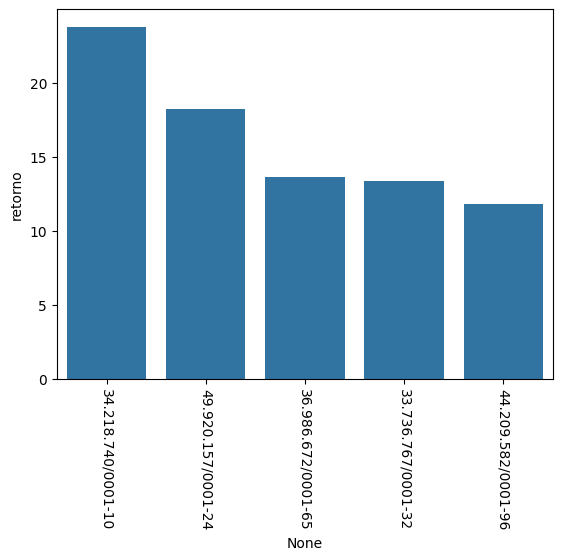

In [180]:
sns.barplot(data = fundo_df, x = fundo_df.index, y = fundo_df.retorno)
plt.xticks(rotation=270);

### **Maiores Quedas**

In [183]:
# menores - rendimento dos Fundos
baixas = (cotas_normalizados.sort_values('Quota_Final', ascending = True)[:5]['Quota_Final'] - 1) * 100
baixas

CNPJ_FUNDO
18.558.694/0001-42   -8.849383
29.197.177/0001-01   -7.103354
08.828.888/0001-67   -7.033500
68.670.512/0001-07   -7.015846
03.917.776/0001-69   -7.013979
Name: Quota_Final, dtype: float64

In [185]:
# informação de dezempenho
fundo_df = pd.DataFrame(columns = ['retorno','Fundo','Classe','PL'])
fundo_df

,retorno,Fundo,Classe,PL


In [186]:
# Populando o Dataframe
for cnpj in baixas.index:
    fundo = cadastral[cadastral['CNPJ_FUNDO'] == cnpj]
    fundo_df.loc[cnpj] = [baixas[baixas.index == cnpj].values[0],
                          fundo['DENOM_SOCIAL'].values[0],
                          fundo['CLASSE'].values[0],
                          fundo['VL_PATRIM_LIQ'].values[0]]
fundo_df

,retorno,Fundo,Classe,PL
18.558.694/0001-42,-8.849383,CTM ESTRATEGIA FUNDO DE INVESTIMENTO EM AÇÕES ...,Fundo de Ações,3.680453e+07
29.197.177/0001-01,-7.103354,ITAÚ AÇÕES PETROBRAS I - FUNDO DE INVESTIMENTO,Fundo de Ações,8.932915e+07
08.828.888/0001-67,-7.033500,SANTANDER FUNDO DE INVESTIMENTO EM COTAS DE FU...,Fundo de Ações,1.192942e+08
68.670.512/0001-07,-7.015846,CSN INVEST FUNDO DE INVESTIMENTO EM AÇÕES,Fundo de Ações,1.726550e+08
03.917.776/0001-69,-7.013979,ITAU PETROBRAS FMP - FGTS,FMP-FGTS,3.483134e+08


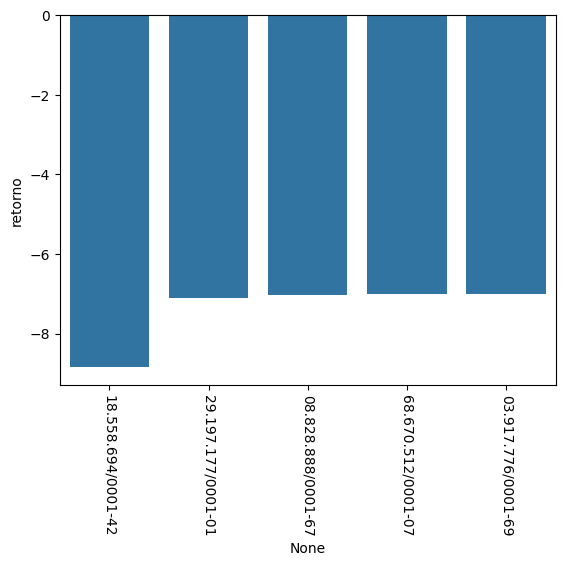

In [187]:
sns.barplot(data = fundo_df, x = fundo_df.index, y = fundo_df.retorno)
plt.xticks(rotation=270);